Value at Risk (VAR) at 95.0% confidence for 1 day(s): 0.40 USD


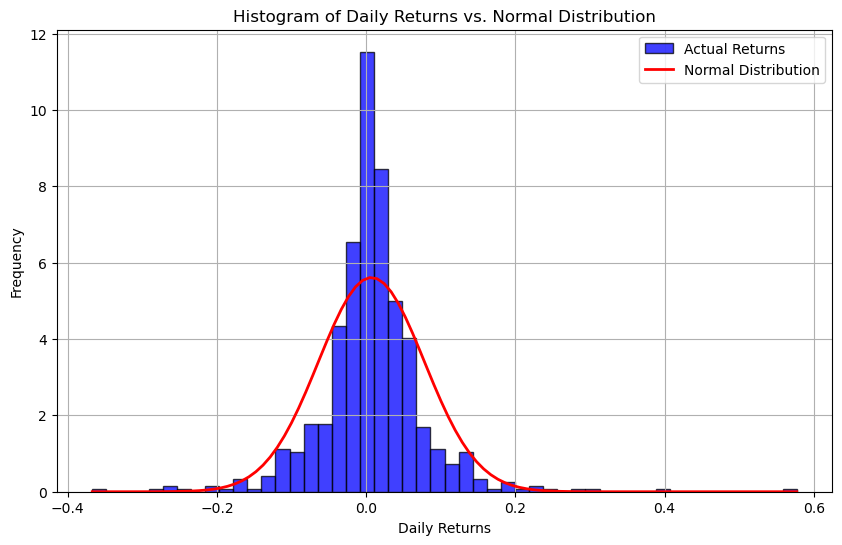

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load CSV data into a DataFrame
data = pd.read_csv('ribbon_finance_data.csv')  # Replace 'your_data.csv' with the actual CSV file path

# Calculate daily returns
data['returns'] = data['token_price'].pct_change()

# Parameters for VAR calculation
confidence_level = 0.95
time_horizon = 1

# Calculate VAR using historical simulation method
var = -np.percentile(data['returns'].dropna(), (1 - confidence_level) * 100)
var *= data['token_price'].iloc[-1]

# Print VAR value
print(f"Value at Risk (VAR) at {confidence_level*100}% confidence for {time_horizon} day(s): {var:.2f} USD")

# Create a histogram of returns
plt.figure(figsize=(10, 6))
plt.hist(data['returns'].dropna(), bins=50, alpha=0.75, color='b', edgecolor='k', density=True, label='Actual Returns')

# Calculate mean and standard deviation of returns
mean_return = data['returns'].mean()
std_return = data['returns'].std()

# Generate values for the normal distribution curve
x = np.linspace(data['returns'].min(), data['returns'].max(), 100)
pdf = norm.pdf(x, loc=mean_return, scale=std_return)

# Plot the normal distribution curve
plt.plot(x, pdf, 'r-', lw=2, label='Normal Distribution')

plt.title('Histogram of Daily Returns vs. Normal Distribution')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


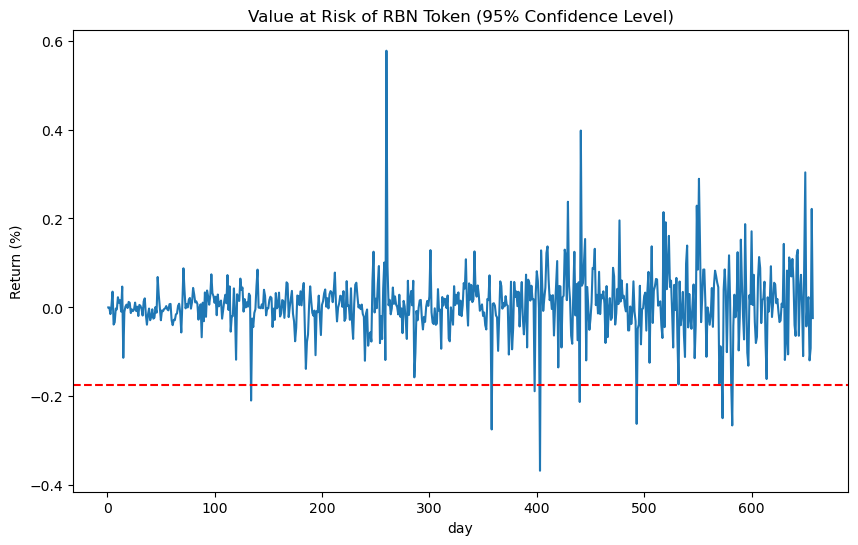

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_var(df, confidence_level):
  """
  Calculates the Value at Risk (VaR) of a given dataset using the historical simulation approach.

  Args:
    df: A Pandas DataFrame containing the historical returns of the asset.
    confidence_level: The confidence level of the VaR calculation, expressed as a percentage.

  Returns:
    The VaR of the asset at the given confidence level.
  """

  # Calculate the daily returns of the asset.
  returns = df["token_price"].pct_change()

  # Sort the returns from worst to best.
  sorted_returns = returns.sort_values(ascending=False)

  # Calculate the VaR as the negative of the (1 - confidence_level)th percentile of the sorted returns.
  var = sorted_returns.iloc[int(1 - confidence_level * 100)] * df["token_price"].iloc[-1]

  return var

# Read the CSV file containing the historical RBN token prices.
df = pd.read_csv("ribbon_finance_data.csv")

# Calculate the VaR of the RBN token at the 95% confidence level.
var = calculate_var(df, 0.95)

# Generate a plot of the historical returns and the VaR.
plt.figure(figsize=(10, 6))
plt.plot(df["token_price"].pct_change())
plt.axhline(y=var, color="red", linestyle="--")
plt.xlabel("day")
plt.ylabel("Return (%)")
plt.title("Value at Risk of RBN Token (95% Confidence Level)")
plt.show()


Maximum Drawdown: -64.71%
Maximum Drawdown Duration: 0 days


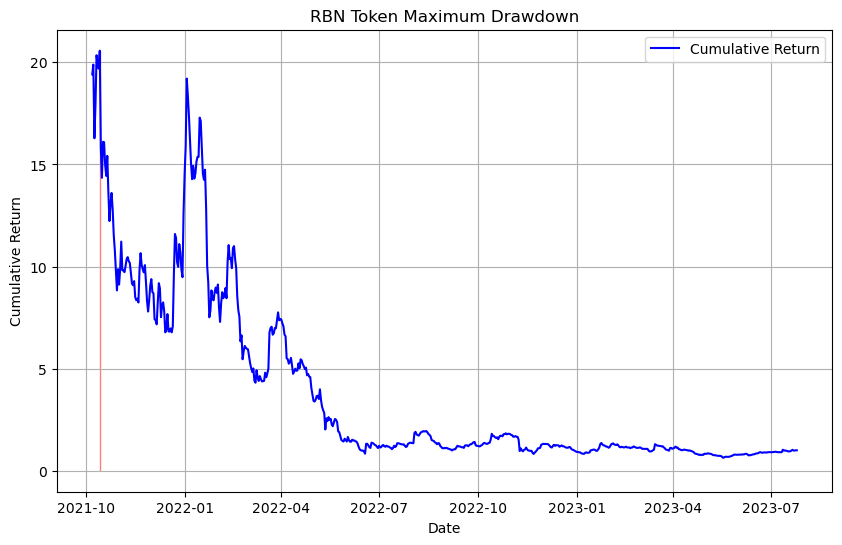

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your CSV file with historical prices
file_path = 'ribbon_finance_data.csv'
df = pd.read_csv(file_path)

# Convert the 'date' column to a datetime object
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Calculate the daily returns
df['daily_return'] = df['token_price'].pct_change()

# Calculate the cumulative returns
df['cumulative_return'] = (1 + df['daily_return']).cumprod()

# Calculate the maximum drawdown manually
max_drawdown = (df['cumulative_return'] / df['cumulative_return'].cummax() - 1).min()

# Find the start and end dates of the maximum drawdown
end_date = df[df['cumulative_return'] == df['cumulative_return'].cummax().max()].index[0]
start_date = df[df.index <= end_date]['cumulative_return'].idxmax()

# Calculate the duration of the maximum drawdown
max_drawdown_duration = (end_date - start_date).days

# Print the results
print(f"Maximum Drawdown: {max_drawdown:.2%}")
print(f"Maximum Drawdown Duration: {max_drawdown_duration} days")

# Plot the cumulative return and highlight the drawdown period
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['cumulative_return'], label='Cumulative Return', color='blue')
plt.fill_between(df.index, 0, df['cumulative_return'], where=(df.index >= start_date) & (df.index <= end_date), color='red', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('RBN Token Maximum Drawdown')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


            token_price
date                   
2023-07-26     0.203625
2023-07-25     0.203625
2023-07-24     0.203625
2023-07-23     0.200572
2023-07-22     0.201431
...                 ...
2021-10-11     4.143221
2021-10-10     3.650000
2021-10-09     3.315267
2021-10-08     4.049737
2021-10-07     3.952830

[658 rows x 1 columns]


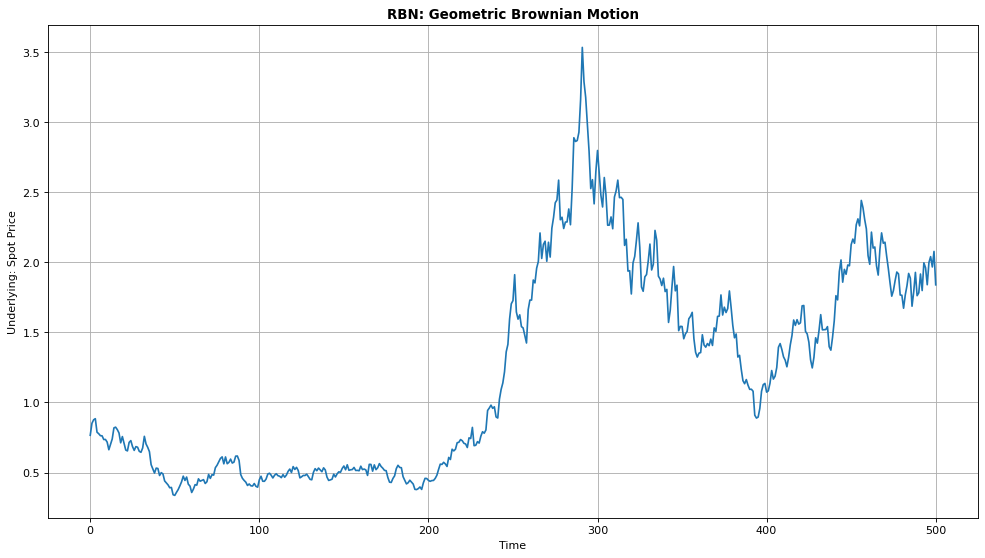

In [4]:
import math
import warnings
import pandas as pd
import numpy as np
import numpy.random as npr
from pylab import plt, mpl

warnings.filterwarnings('ignore', 'invalid value encountered in log')

df_rbn = pd.read_csv('ribbon_finance_data.csv', parse_dates=['date']).set_index('date')

print(df_rbn)

npr.seed(3) # seed for getting the same result each time. 
# -------------Geometric Brownian Motion (granual/steps)--------------------
S0 = df_rbn['token_price'].mean() # Starting Price
r = np.log(df_rbn['token_price']/df_rbn['token_price'].shift(1)).mean() * 365 # drift (expected rate of return)
sigma = np.log(df_rbn['token_price']/df_rbn['token_price'].shift(1)).std() * np.sqrt(365) # historical volatility
I = 1 # simulations
M = 500 # steps per simimulation
T = 1 # time period
dt = T / M # steps per time period

S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    S[t] = S[t-1] + r * S[t-1] * dt + S[t-1] * sigma * math.sqrt(dt) * npr.standard_normal(I)



plt.figure(figsize=(15, 8), dpi=80)
plt.plot(S[:, :I])
plt.grid()
plt.title('RBN: Geometric Brownian Motion', fontweight='bold')
plt.xlabel('Time')
plt.ylabel('Underlying: Spot Price')
plt.show()

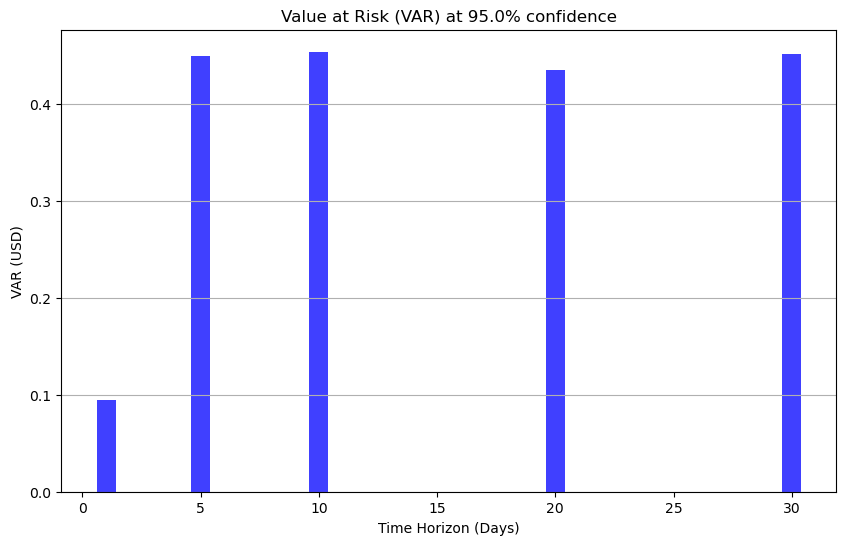

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load CSV data into a DataFrame
data = pd.read_csv('ribbon_finance_data.csv')  # Replace 'your_data.csv' with the actual CSV file path

# Calculate daily returns
data['returns'] = data['token_price'].pct_change()

# Parameters for VAR calculation
confidence_level = 0.95
time_horizons = [1, 5, 10, 20, 30]  # Different time horizons in days

# Initialize lists to store VAR values and corresponding horizons
var_values = []
horizon_values = []

for time_horizon in time_horizons:
    # Calculate VAR using historical simulation method
    returns_slice = data['returns'].dropna()[-time_horizon:]
    var = -np.percentile(returns_slice, (1 - confidence_level) * 100)
    var *= data['token_price'].iloc[-1]

    # Append VAR value and corresponding horizon to lists
    var_values.append(var)
    horizon_values.append(time_horizon)

# Create a bar chart to visualize VAR over different horizons
plt.figure(figsize=(10, 6))
plt.bar(horizon_values, var_values, color='b', alpha=0.75)
plt.title(f'Value at Risk (VAR) at {confidence_level*100}% confidence')
plt.xlabel('Time Horizon (Days)')
plt.ylabel('VAR (USD)')
plt.grid(axis='y')
plt.show()
